# Análisis de caudales con datos crudos

## Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Funciones

In [4]:
# Funciones

def graficar(titulo, df):
    plt.figure(figsize=(16, 6))
    plt.scatter(df.index, df['caudal'], marker='o', linestyle='-', color='b')
    plt.title(titulo)
    plt.xlabel('Fecha-Hora')
    plt.ylabel('Caudal (L/s)')
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

def convertir_fechahora(campo):
    formatos = ['%m/%d/%Y %I:%M %p', '%Y/%d/%m %H:%M']
    for formato in formatos:
        try:
            return pd.to_datetime(campo, format=formato)
        except ValueError:
            continue  
    return pd.NaT 


def graficar_descomposicion(titulo, result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(16, 10))

    ax1.plot(result.observed.index, result.observed, color='blue')
    ax1.set_ylabel('Observed')
    ax1.set_title(titulo)

    ax2.plot(result.trend.index, result.trend, color='orange')
    ax2.set_ylabel('Trend')

    ax3.plot(result.seasonal.index, result.seasonal, color='green')
    ax3.set_ylabel('Seasonal')

    ax4.plot(result.resid.index, result.resid, color='red')
    ax4.set_ylabel('Residual')

    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

## Carga de datos

In [5]:
c1 = pd.read_csv('../Datos/CrudosFebMayo.csv')
print(c1.info())
c1['fechahora'] = c1['Fecha y hora'].apply(lambda x: convertir_fechahora(x))
c1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30700 entries, 0 to 30699
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha y hora  30700 non-null  object 
 1   Caudal (l/s)  30696 non-null  float64
dtypes: float64(1), object(1)
memory usage: 479.8+ KB
None


,Fecha y hora,Caudal (l/s),fechahora
0,01/24/2024 04:39 AM,26.01,2024-01-24 04:39:00
1,01/24/2024 04:40 AM,26.03,2024-01-24 04:40:00
2,01/24/2024 04:41 AM,26.03,2024-01-24 04:41:00
3,01/24/2024 04:42 AM,26.51,2024-01-24 04:42:00
4,01/24/2024 04:43 AM,27.01,2024-01-24 04:43:00
...,...,...,...
30695,05/14/2024 04:55 PM,63.62,2024-05-14 16:55:00
30696,05/14/2024 05:10 PM,59.87,2024-05-14 17:10:00
30697,05/14/2024 05:25 PM,59.87,2024-05-14 17:25:00
30698,05/14/2024 05:40 PM,60.83,2024-05-14 17:40:00


In [6]:
c2 = pd.read_csv('../Datos/CrudosAgostoSept.csv')
print(c2.info())
c2['fechahora'] = c2['Hora'].apply(lambda x: convertir_fechahora(x))
c2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hora          5734 non-null   object 
 1   Caudal (l/s)  5734 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.7+ KB
None


,Hora,Caudal (l/s),fechahora
0,08/16/2024 01:25 PM,72.342658,2024-08-16 13:25:00
1,08/16/2024 01:30 PM,72.992557,2024-08-16 13:30:00
2,08/16/2024 01:35 PM,74.595304,2024-08-16 13:35:00
3,08/16/2024 01:40 PM,74.595304,2024-08-16 13:40:00
4,08/16/2024 01:45 PM,74.595304,2024-08-16 13:45:00
...,...,...,...
5729,09/05/2024 11:00 AM,81.595193,2024-09-05 11:00:00
5730,09/05/2024 11:05 AM,81.595193,2024-09-05 11:05:00
5731,09/05/2024 11:10 AM,81.595193,2024-09-05 11:10:00
5732,09/05/2024 11:15 AM,81.990550,2024-09-05 11:15:00


## Concatenar datos de origen 

In [7]:
df_crudo = pd.concat([
    c1[['fechahora', 'Caudal (l/s)']], 
    c2[['fechahora', 'Caudal (l/s)']]
])
df_crudo.rename(columns={'Caudal (l/s)' : 'caudal'}, inplace=True)
df_crudo = df_crudo.astype({'fechahora': 'datetime64[ns]'})
df_crudo.set_index('fechahora', inplace=True)
df_crudo = df_crudo.sort_index()

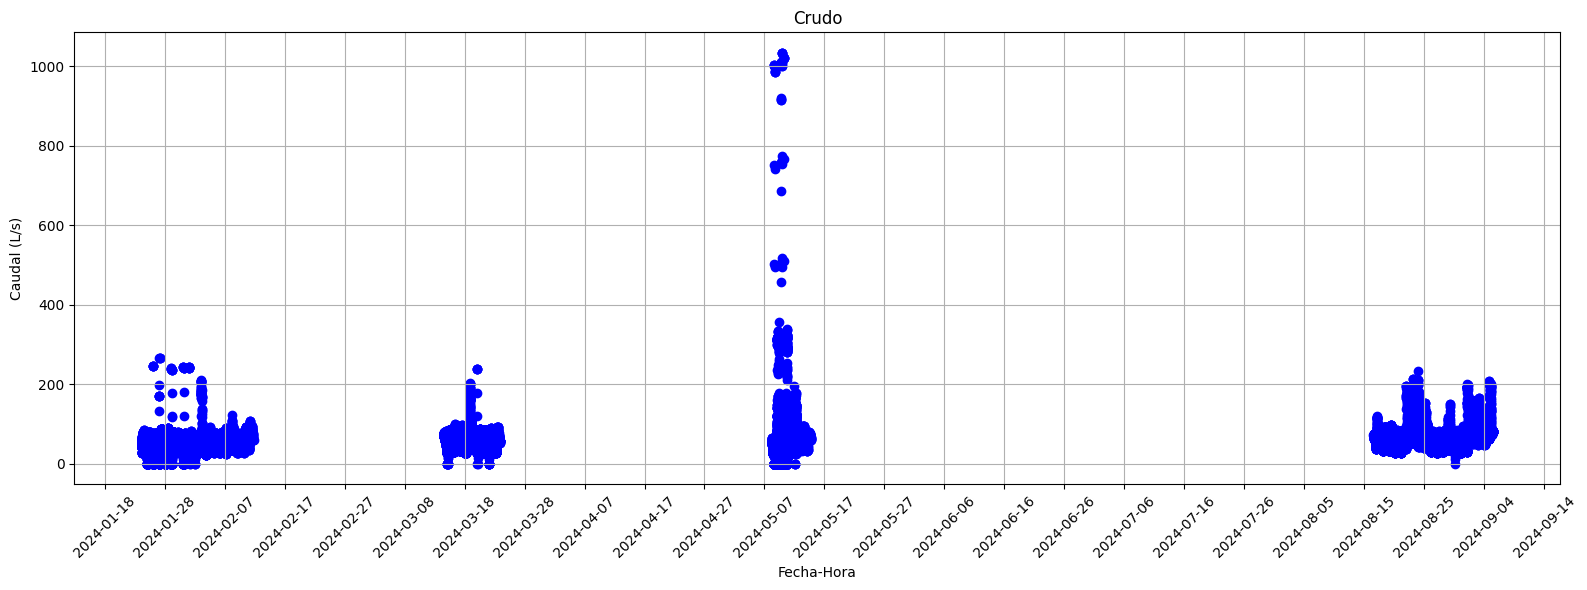

,caudal
fechahora,
2024-01-24 04:39:00,26.010000
2024-01-24 04:40:00,26.030000
2024-01-24 04:41:00,26.030000
2024-01-24 04:42:00,26.510000
2024-01-24 04:43:00,27.010000
...,...
2024-09-05 11:00:00,81.595193
2024-09-05 11:05:00,81.595193
2024-09-05 11:10:00,81.595193


In [8]:
graficar('Crudo', df_crudo)
df_crudo

## Filtro y resample para observar interpolaciones

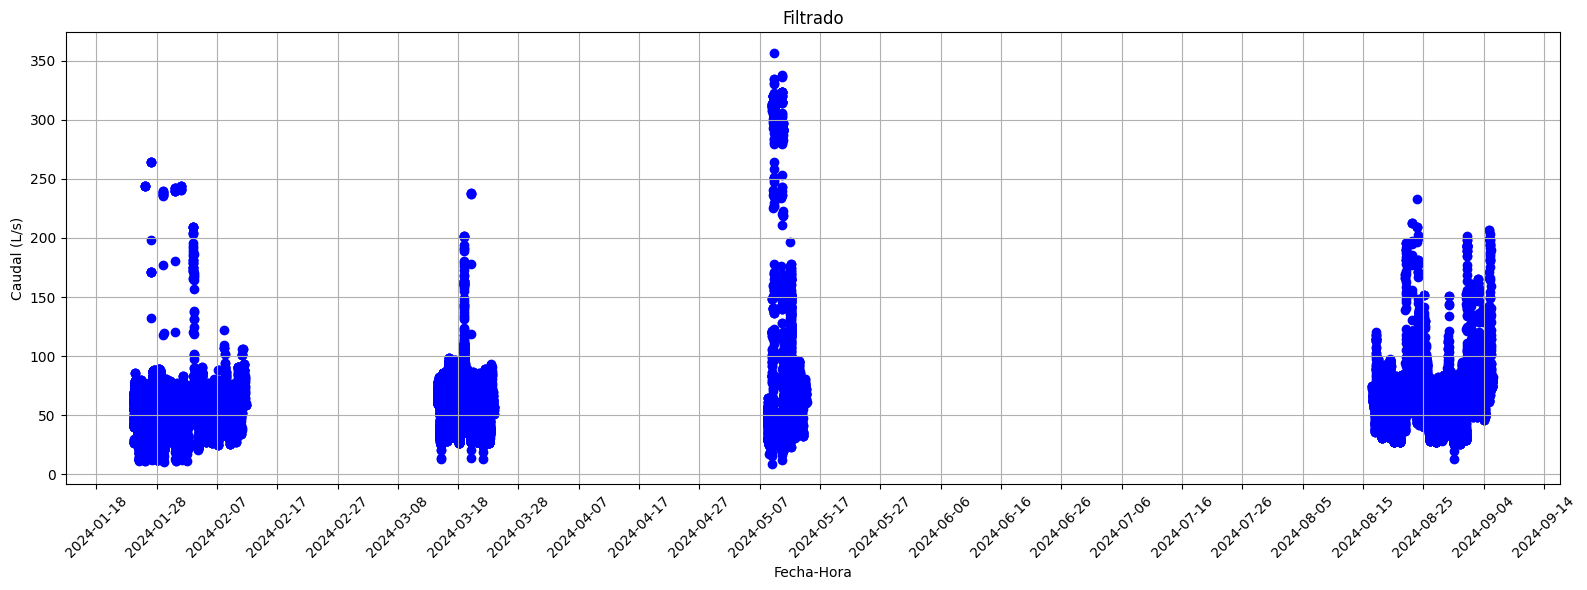

,caudal
fechahora,
2024-01-24 04:39:00,26.010000
2024-01-24 04:40:00,26.030000
2024-01-24 04:41:00,26.030000
2024-01-24 04:42:00,26.510000
2024-01-24 04:43:00,27.010000
...,...
2024-09-05 11:00:00,81.595193
2024-09-05 11:05:00,81.595193
2024-09-05 11:10:00,81.595193


In [9]:
df_filtrado = df_crudo.query('caudal <= 400 and caudal > 0')
graficar('Filtrado', df_filtrado)
df_filtrado

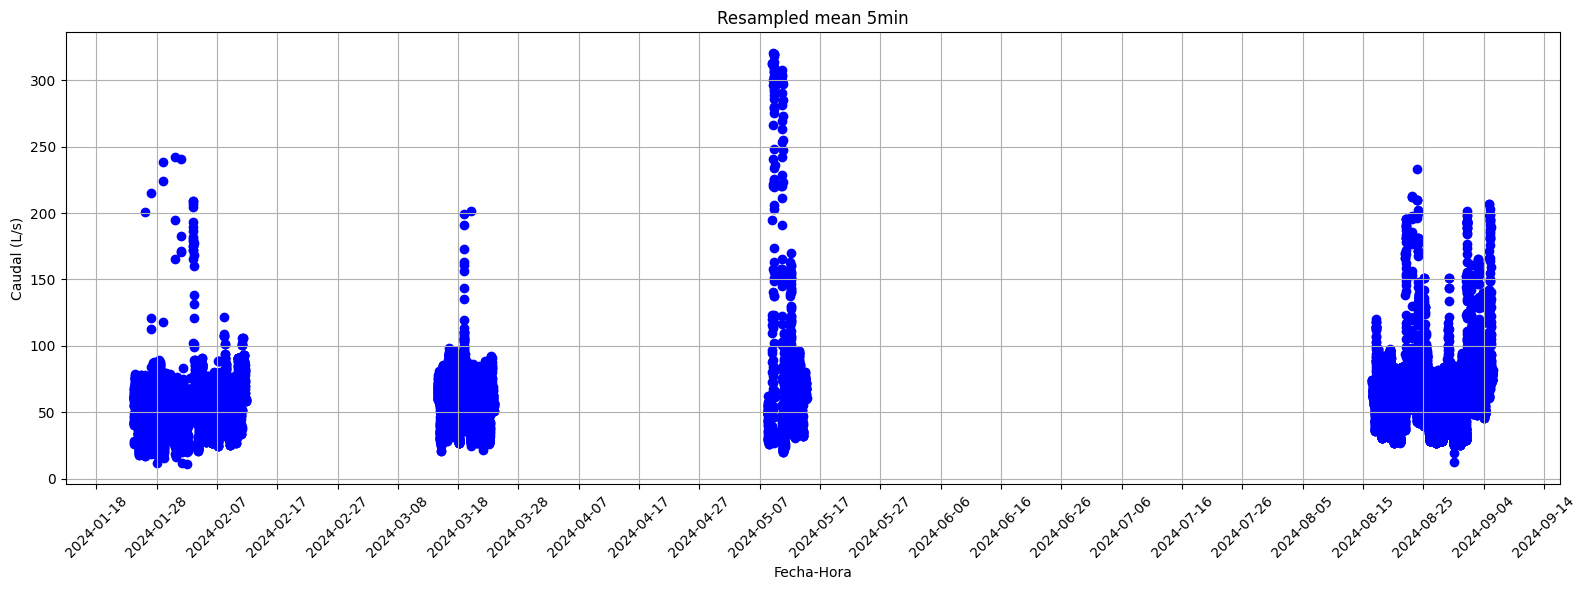

,caudal
fechahora,
2024-01-24 04:35:00,26.010000
2024-01-24 04:40:00,26.618000
2024-01-24 04:45:00,28.660000
2024-01-24 04:50:00,43.035000
2024-01-24 04:55:00,42.472000
...,...
2024-09-05 11:00:00,81.595193
2024-09-05 11:05:00,81.595193
2024-09-05 11:10:00,81.595193


In [10]:

df_resampled = df_filtrado.resample('5min').mean()
graficar('Resampled mean 5min', df_resampled)
df_resampled

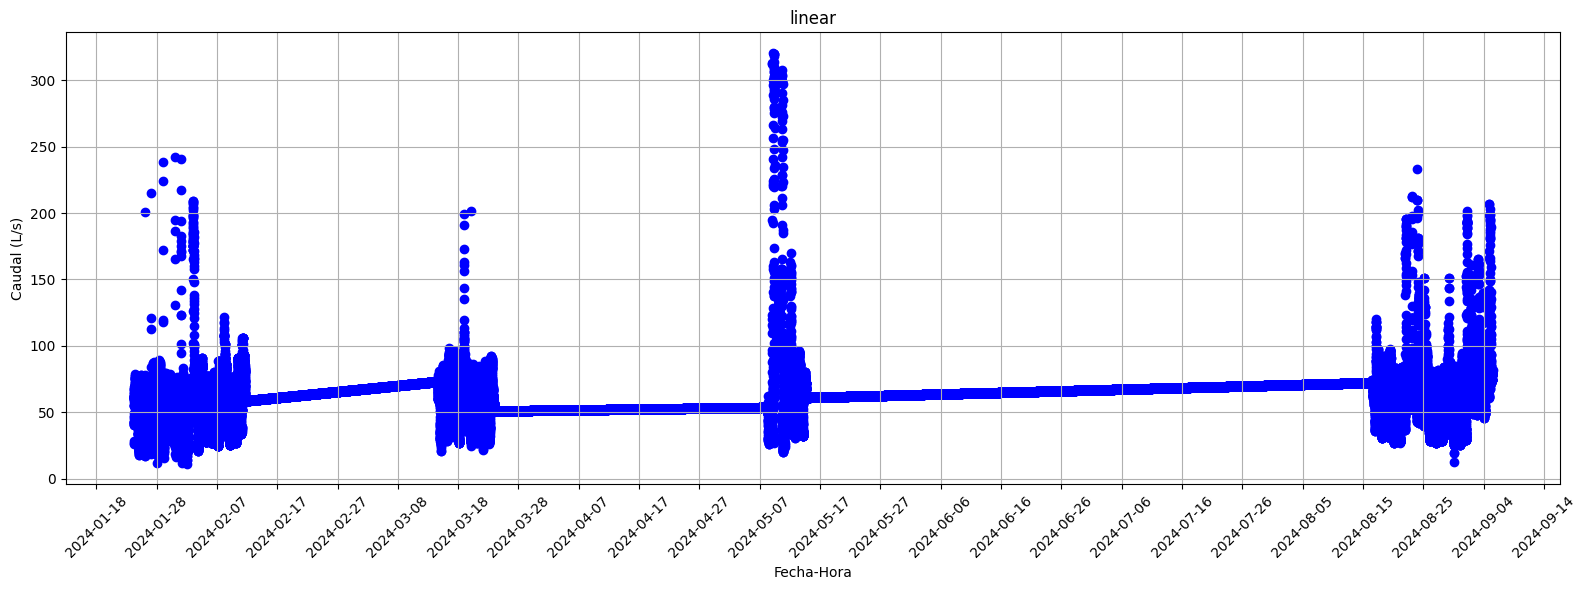

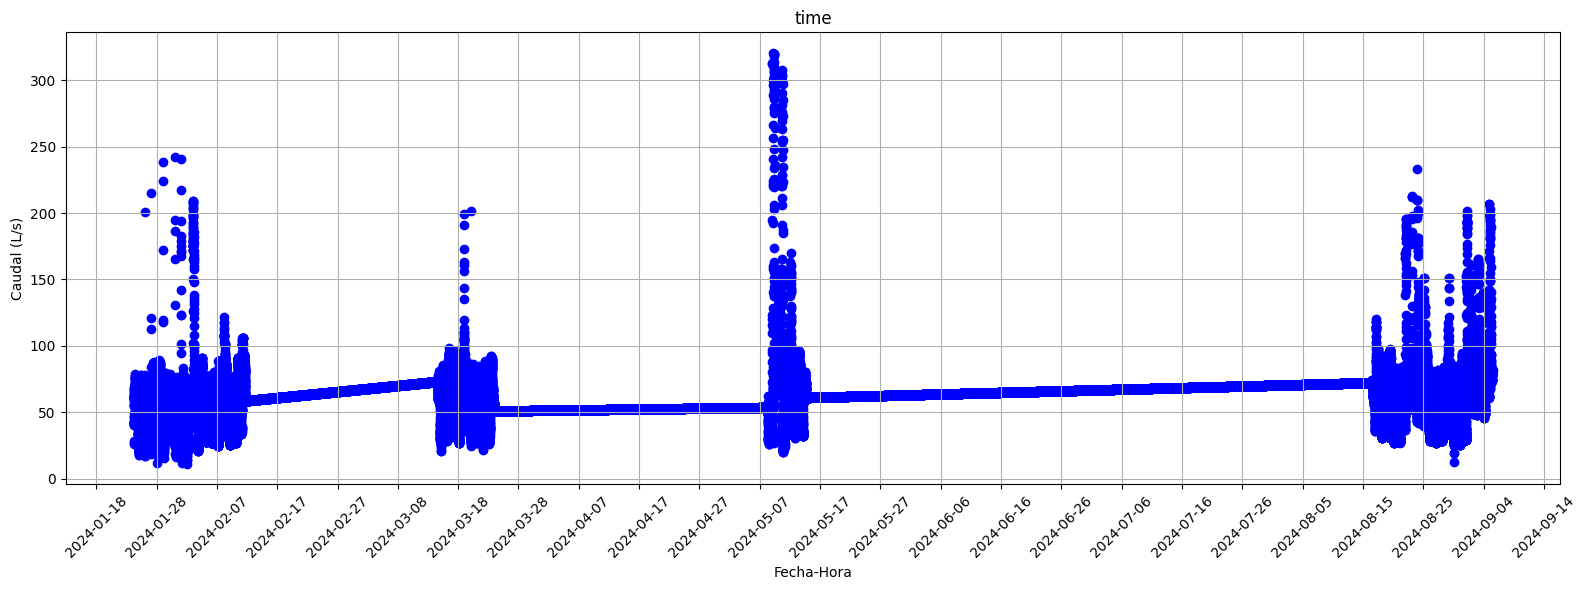

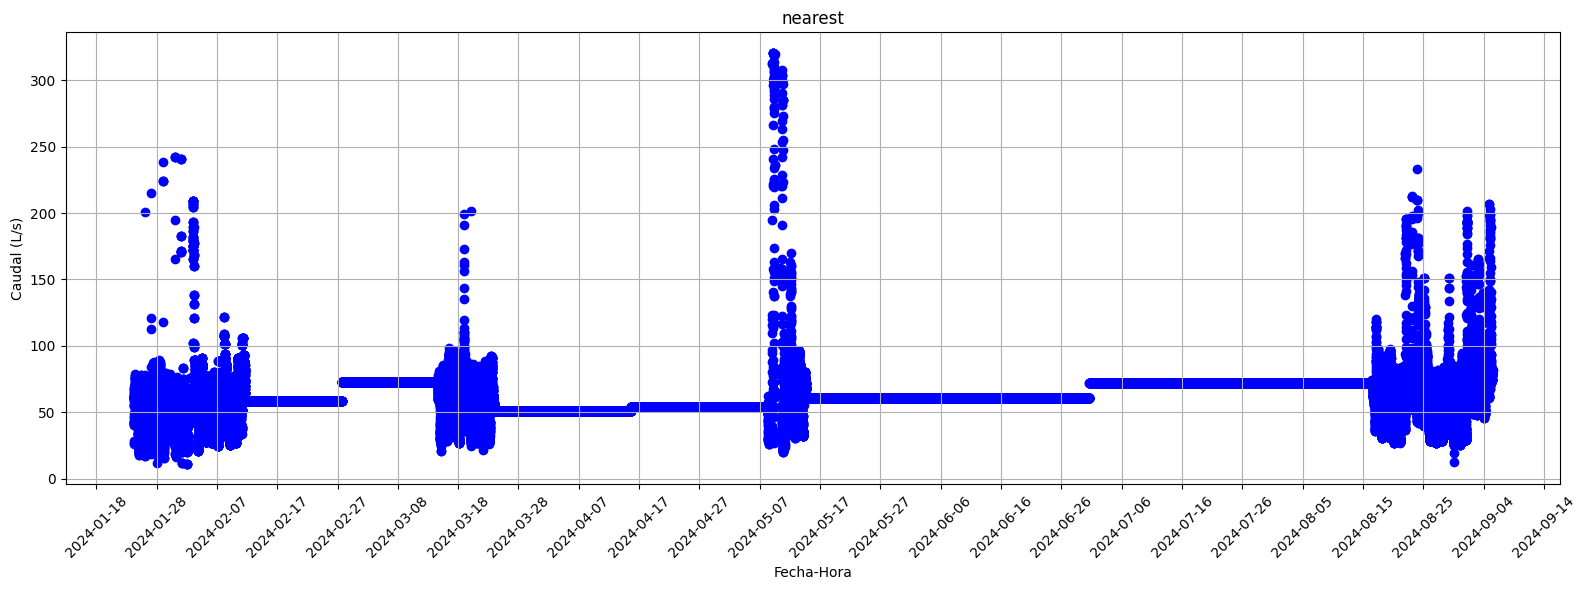

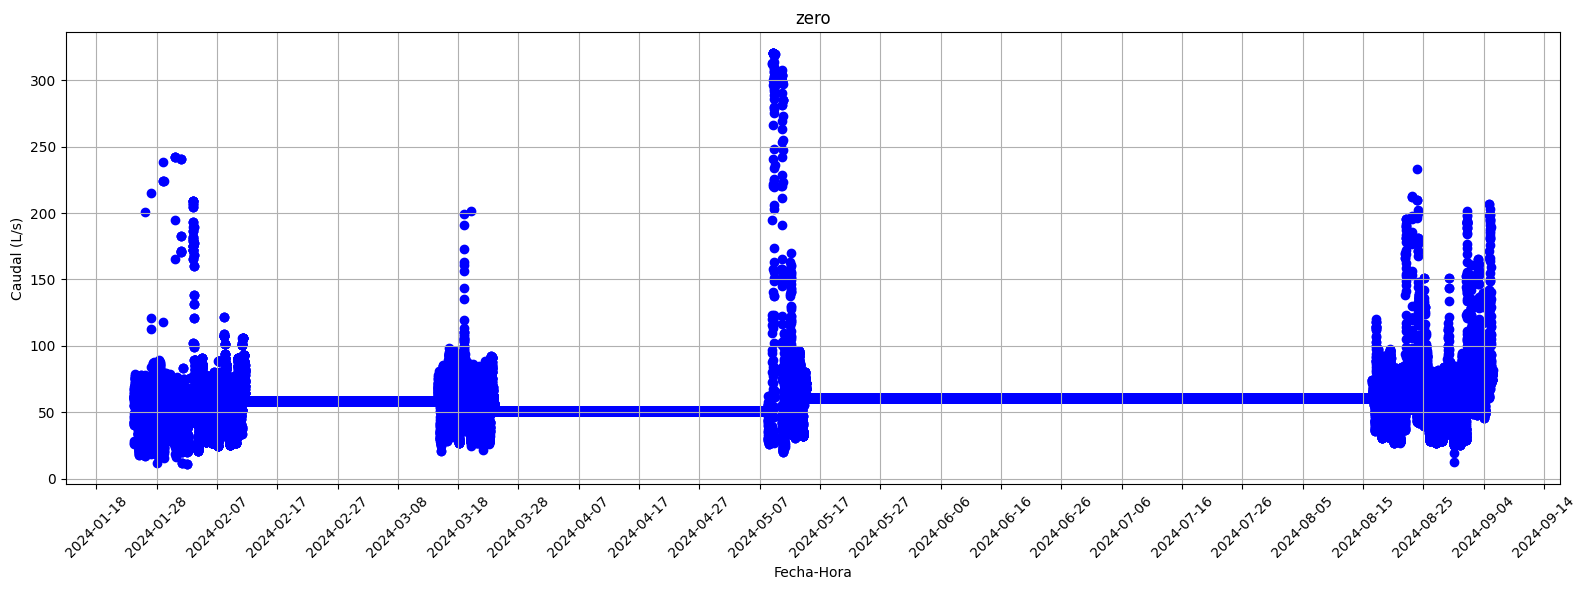

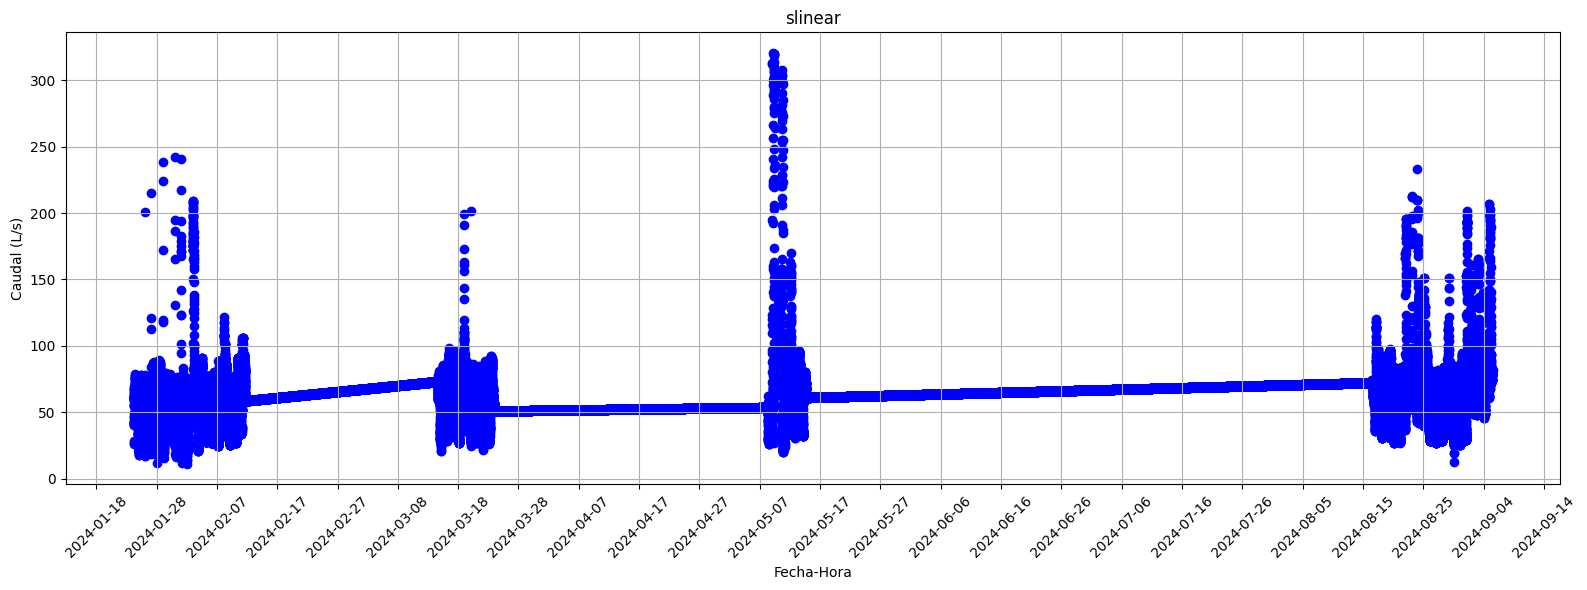

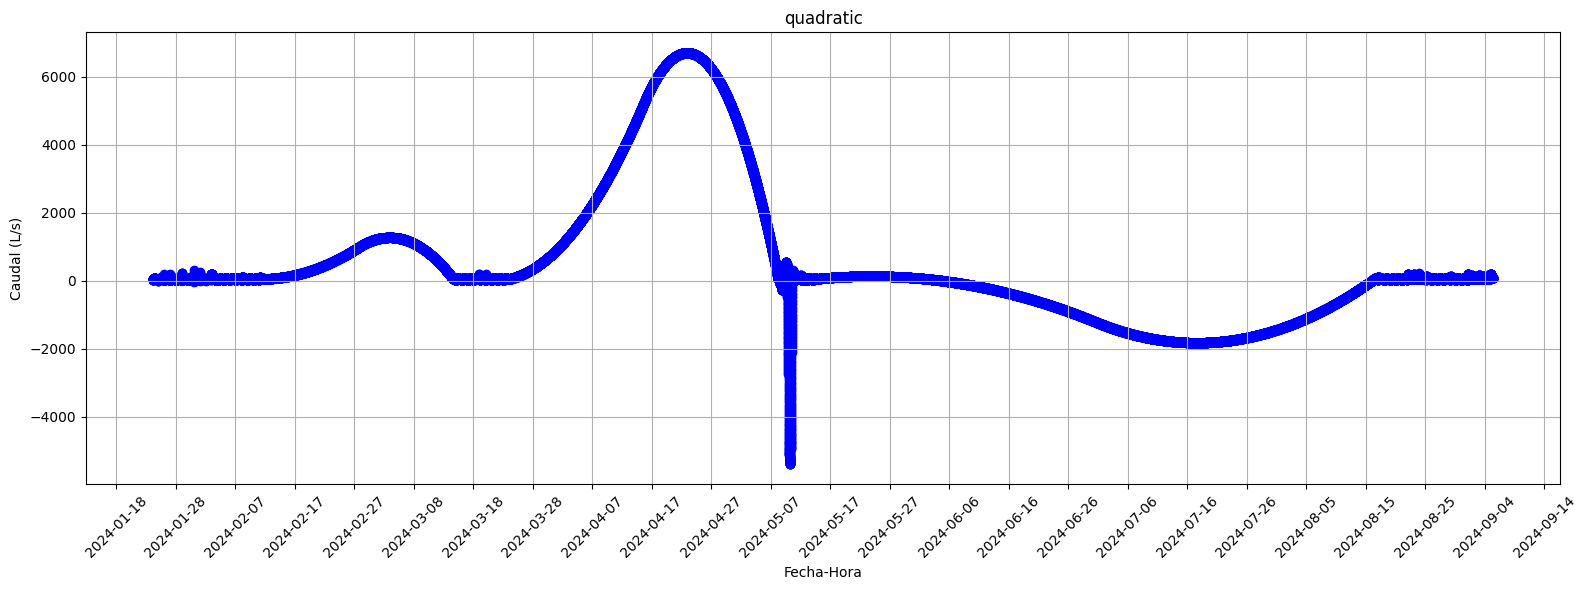

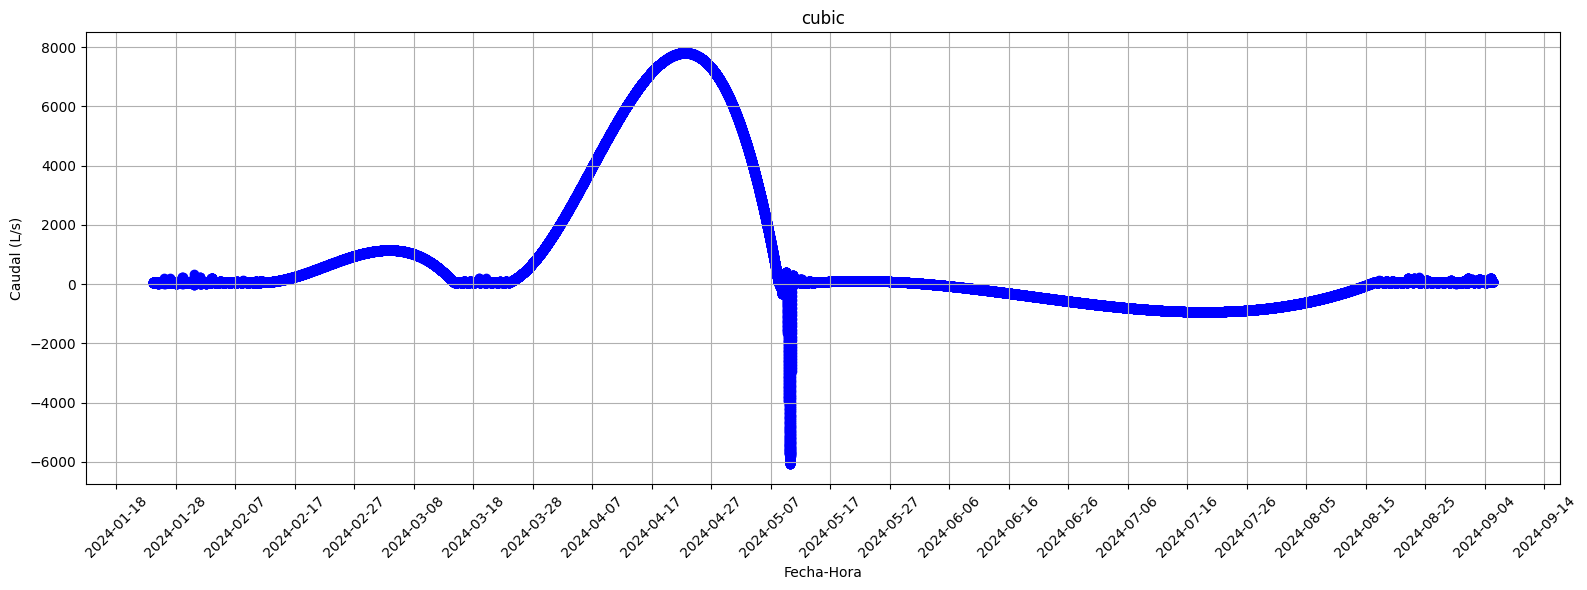

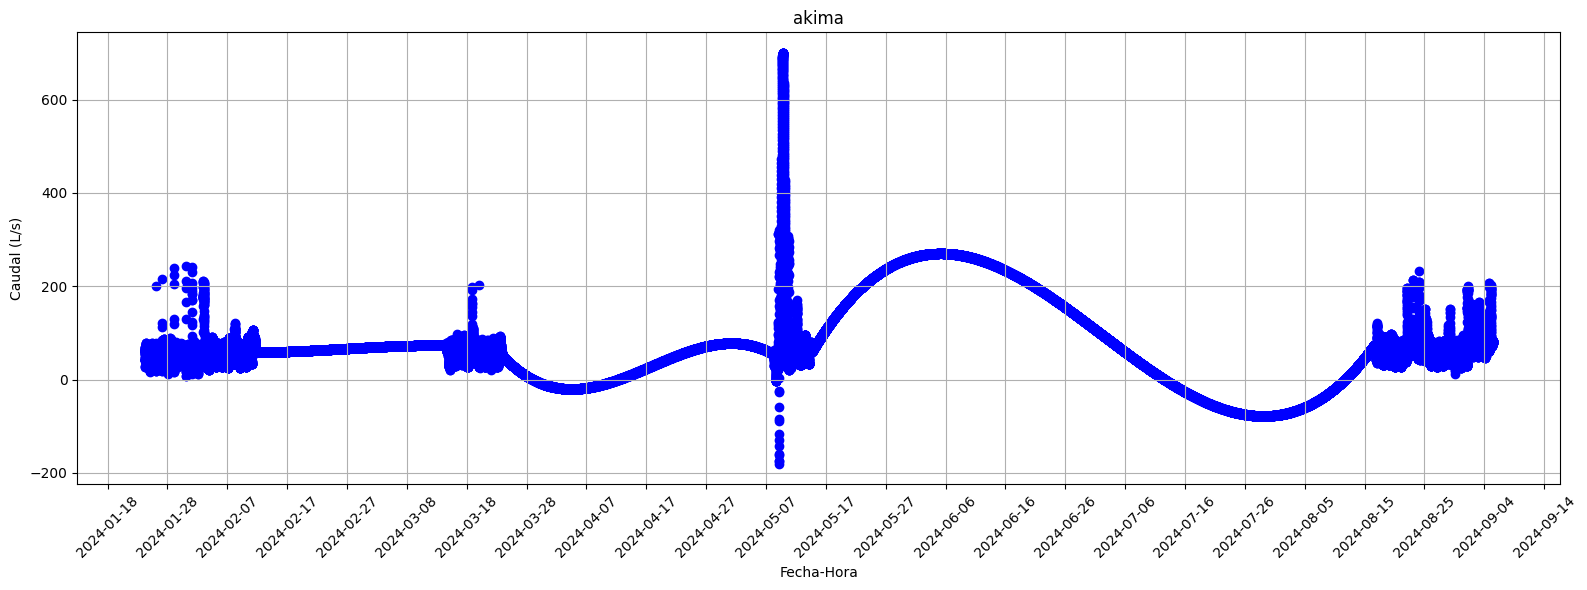

In [11]:
for metodo in ['linear', 'time', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'akima']:
    graficar(metodo, df_resampled.interpolate(method=metodo))

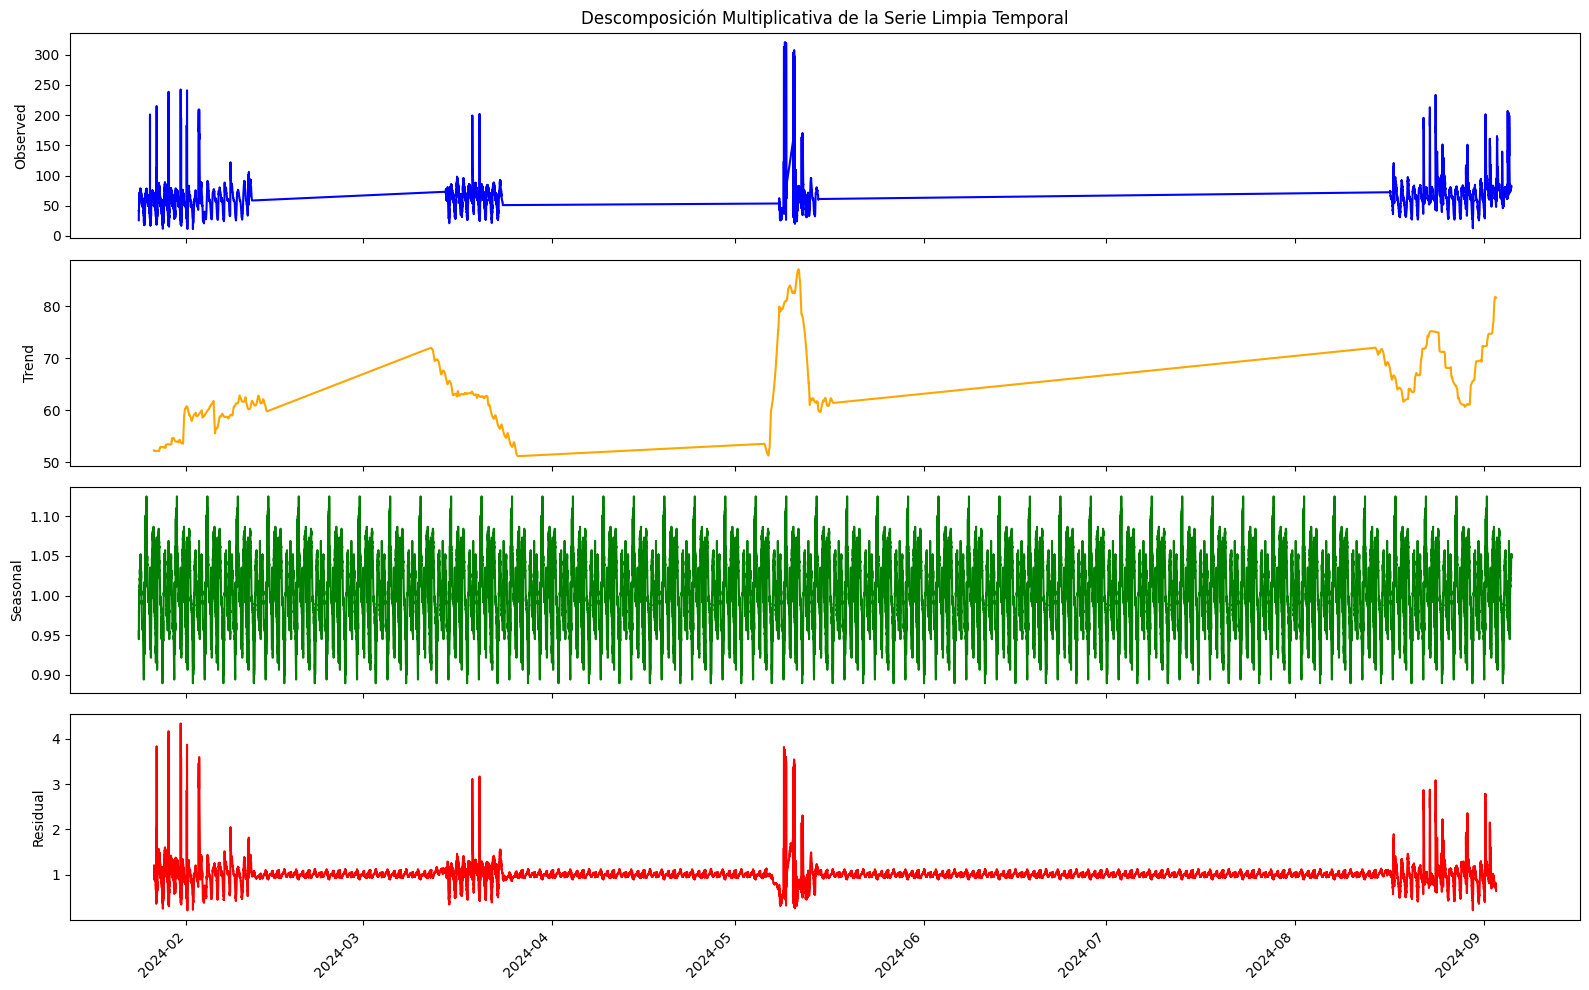

In [12]:
df_interpolado = df_resampled.interpolate(method='time')
result = seasonal_decompose(df_interpolado, model='multiplicative', period=1440)
graficar_descomposicion('Descomposición Multiplicativa de la Serie Limpia Temporal', result)

## Identificar y extraer intervalos con datos útiles

In [13]:
# Identificar grupos

df_grupos = df_crudo.copy()

# Calcular las diferencias entre fechas consecutivas en el índice
diferencias = df_grupos.index.to_series().diff()

# Definir un umbral de diferencia de tiempo (por ejemplo, 1 día)
umbral = pd.Timedelta('1 day')

# Crear un identificador de grupo basado en el umbral
df_grupos['grupo'] = (diferencias > umbral).cumsum()

print(df_grupos['grupo'].unique())

df_grupos

[0 1 2 3]


,caudal,grupo
fechahora,,
2024-01-24 04:39:00,26.010000,0
2024-01-24 04:40:00,26.030000,0
2024-01-24 04:41:00,26.030000,0
2024-01-24 04:42:00,26.510000,0
2024-01-24 04:43:00,27.010000,0
...,...,...
2024-09-05 11:00:00,81.595193,3
2024-09-05 11:05:00,81.595193,3
2024-09-05 11:10:00,81.595193,3


In [14]:
# Separar series según su grupo

lista_series = []
grupos = df_grupos['grupo'].unique()
for grupo in grupos:
    serie = df_grupos.query(f'grupo == {grupo}')['caudal']
    serie = serie[(serie > 0) & (serie <= 150)]
    serie = serie.resample('5min').mean()
    lista_series.append(serie)
    print(serie.info())
    print(serie)
    print('-' * 80)

<class 'pandas.core.series.Series'>
DatetimeIndex: 5359 entries, 2024-01-24 04:35:00 to 2024-02-11 19:05:00
Freq: 5min
Series name: caudal
Non-Null Count  Dtype  
--------------  -----  
3102 non-null   float64
dtypes: float64(1)
memory usage: 83.7 KB
None
fechahora
2024-01-24 04:35:00    26.010
2024-01-24 04:40:00    26.618
2024-01-24 04:45:00    28.660
2024-01-24 04:50:00    43.035
2024-01-24 04:55:00    42.472
                        ...  
2024-02-11 18:45:00       NaN
2024-02-11 18:50:00    58.690
2024-02-11 18:55:00       NaN
2024-02-11 19:00:00       NaN
2024-02-11 19:05:00    58.690
Freq: 5min, Name: caudal, Length: 5359, dtype: float64
--------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
DatetimeIndex: 2696 entries, 2024-03-14 14:05:00 to 2024-03-23 22:40:00
Freq: 5min
Series name: caudal
Non-Null Count  Dtype  
--------------  -----  
2541 non-null   float64
dtypes: float64(1)
memory usage: 42.1 KB
None
fechahora


## Evaluar cada intervalo útil por separado

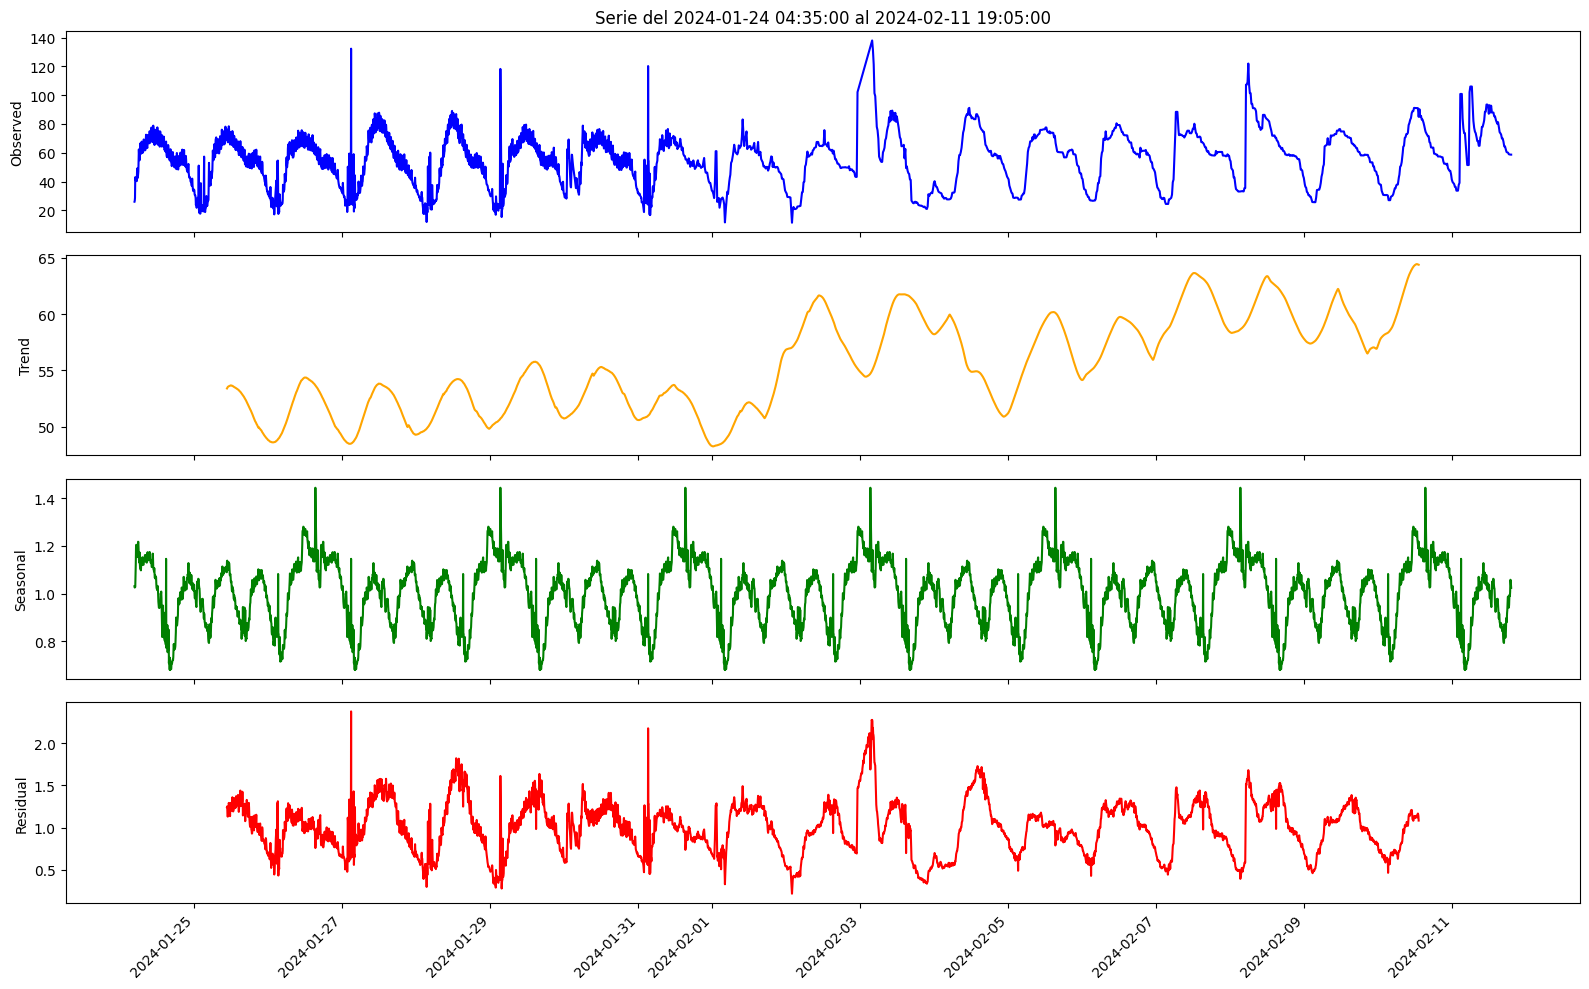

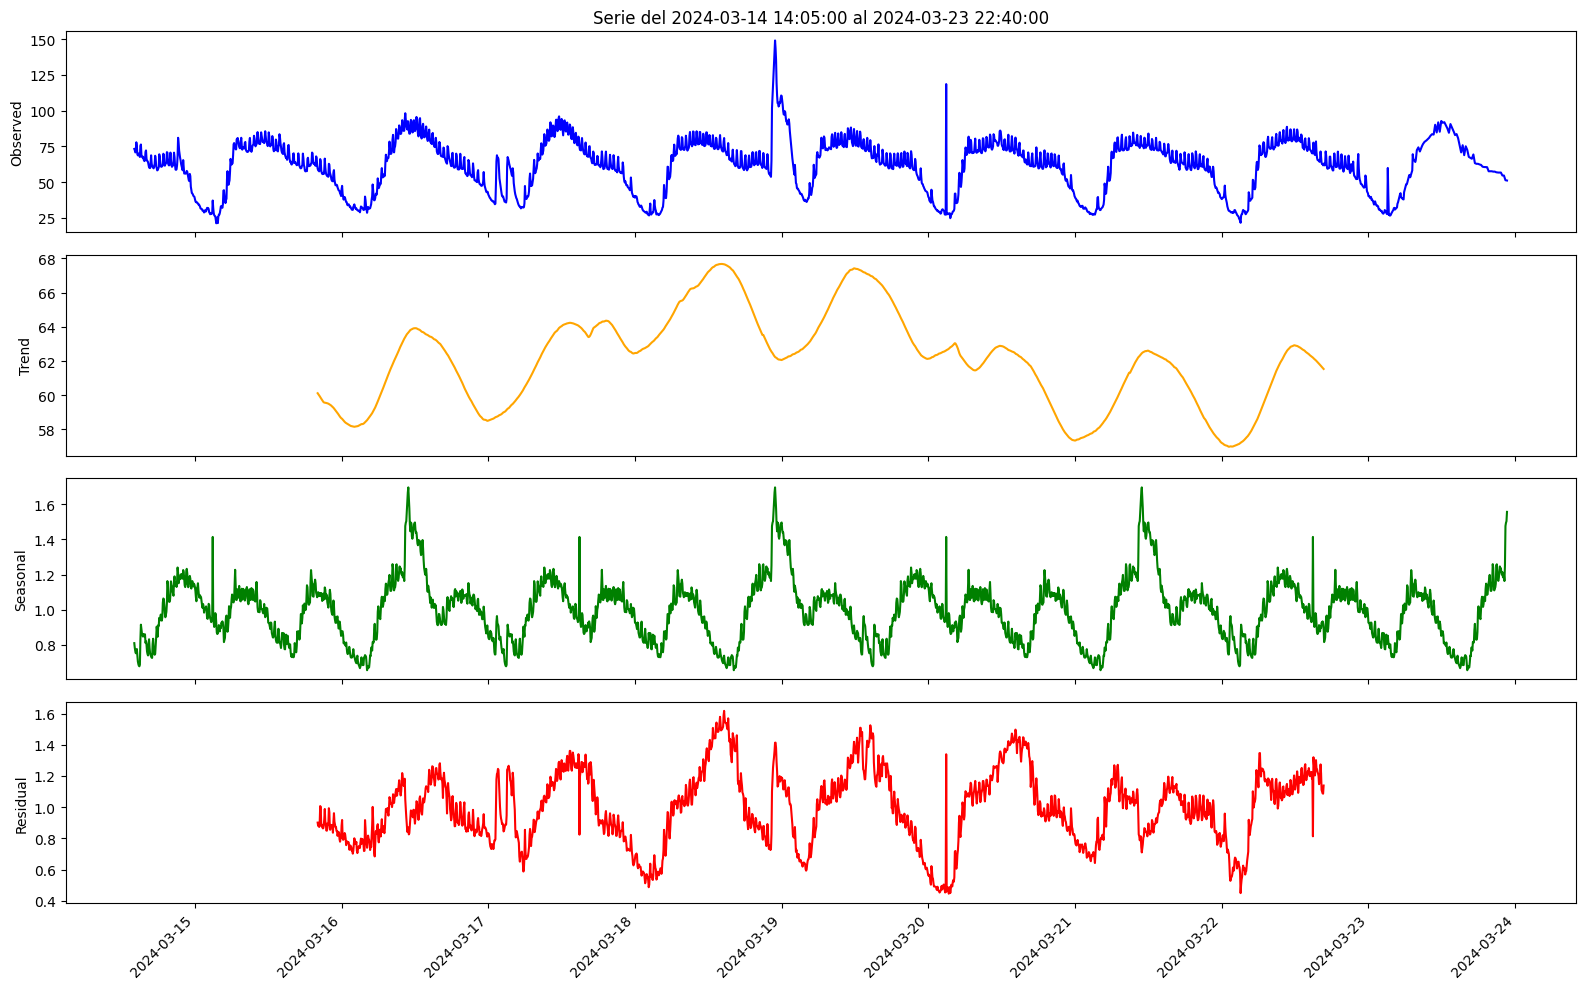

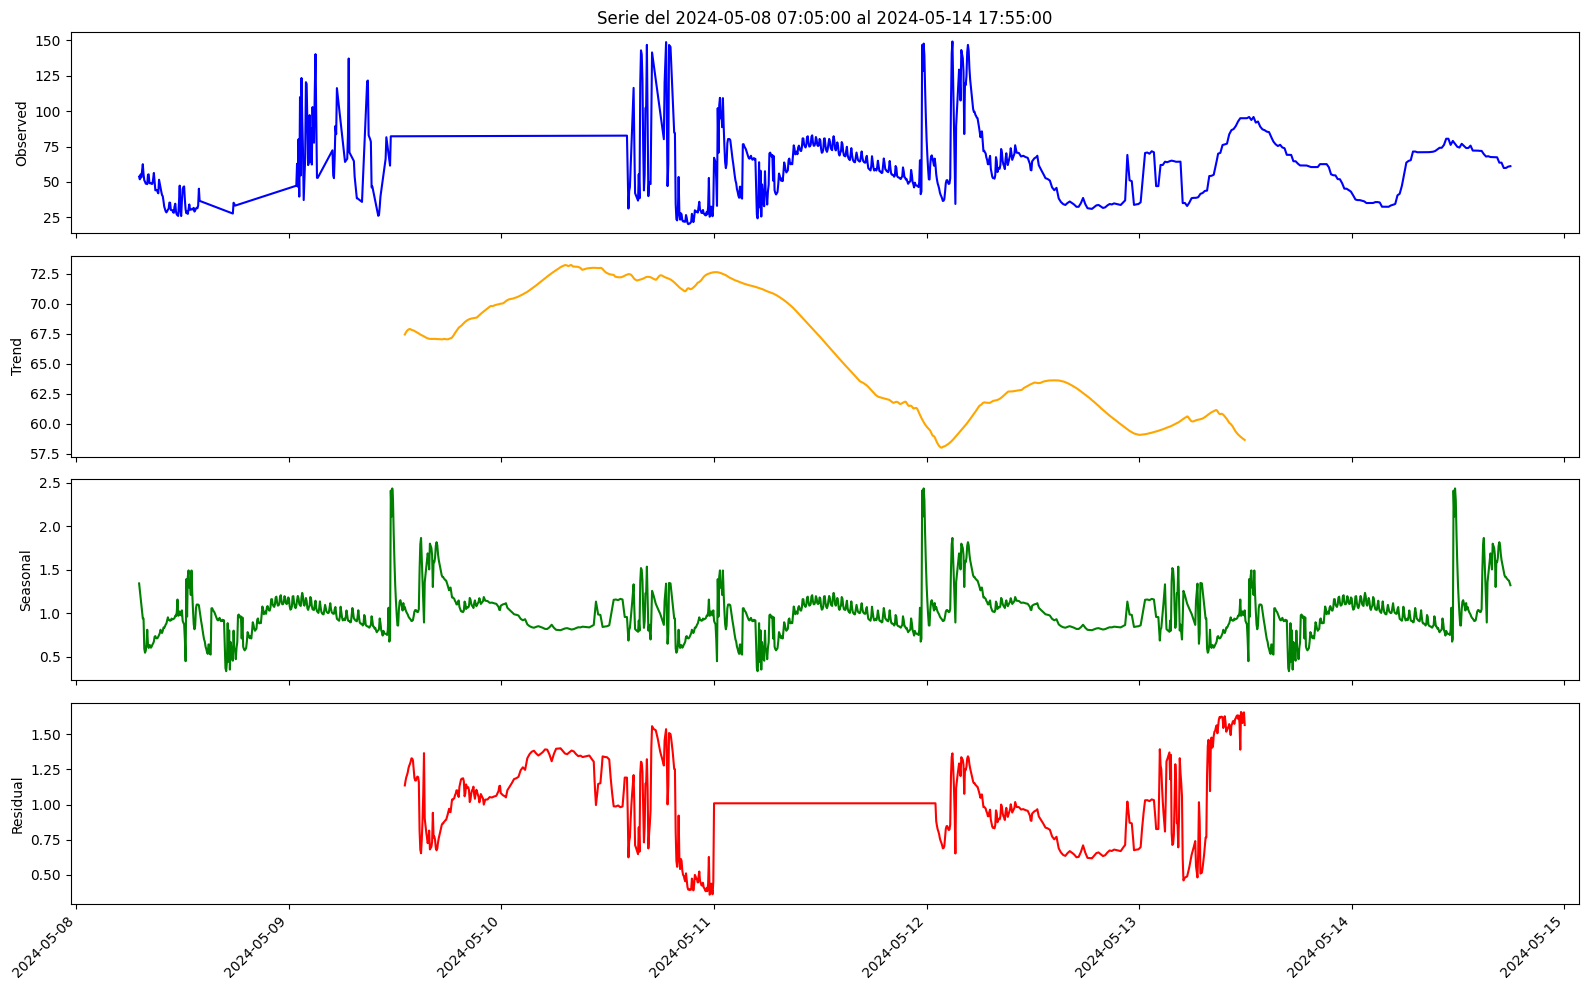

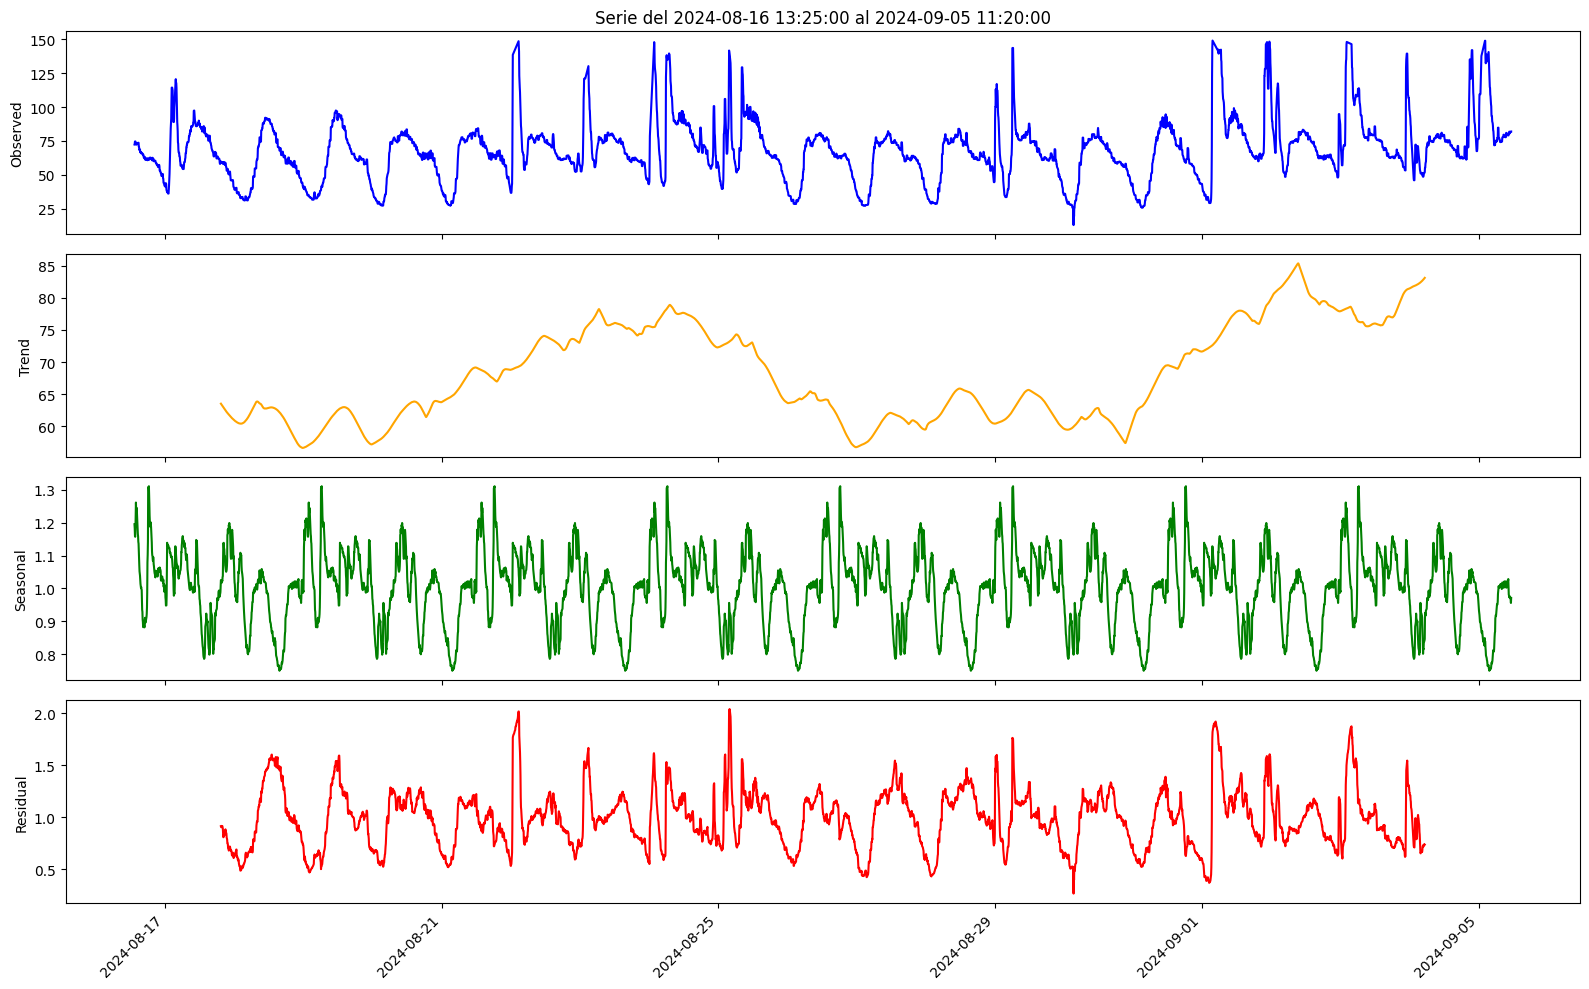

In [15]:
# Procesar independientemente cada serie

for serie in lista_series:
    titulo = f'Serie del {serie.index.min()} al {serie.index.max()}'
    resultado = seasonal_decompose(serie.interpolate(), model='multiplicative', period=720)
    graficar_descomposicion(titulo, resultado)
    

## Evaluar unión de intervalos útiles

2000-01-01 00:00:00    26.010000
2000-01-01 00:05:00    26.618000
2000-01-01 00:10:00    28.660000
2000-01-01 00:15:00    43.035000
2000-01-01 00:20:00    42.472000
                         ...    
2000-02-24 07:45:00    81.595193
2000-02-24 07:50:00    81.595193
2000-02-24 07:55:00    81.595193
2000-02-24 08:00:00    81.990550
2000-02-24 08:05:00    81.990550
Freq: 5min, Name: caudal, Length: 15650, dtype: float64


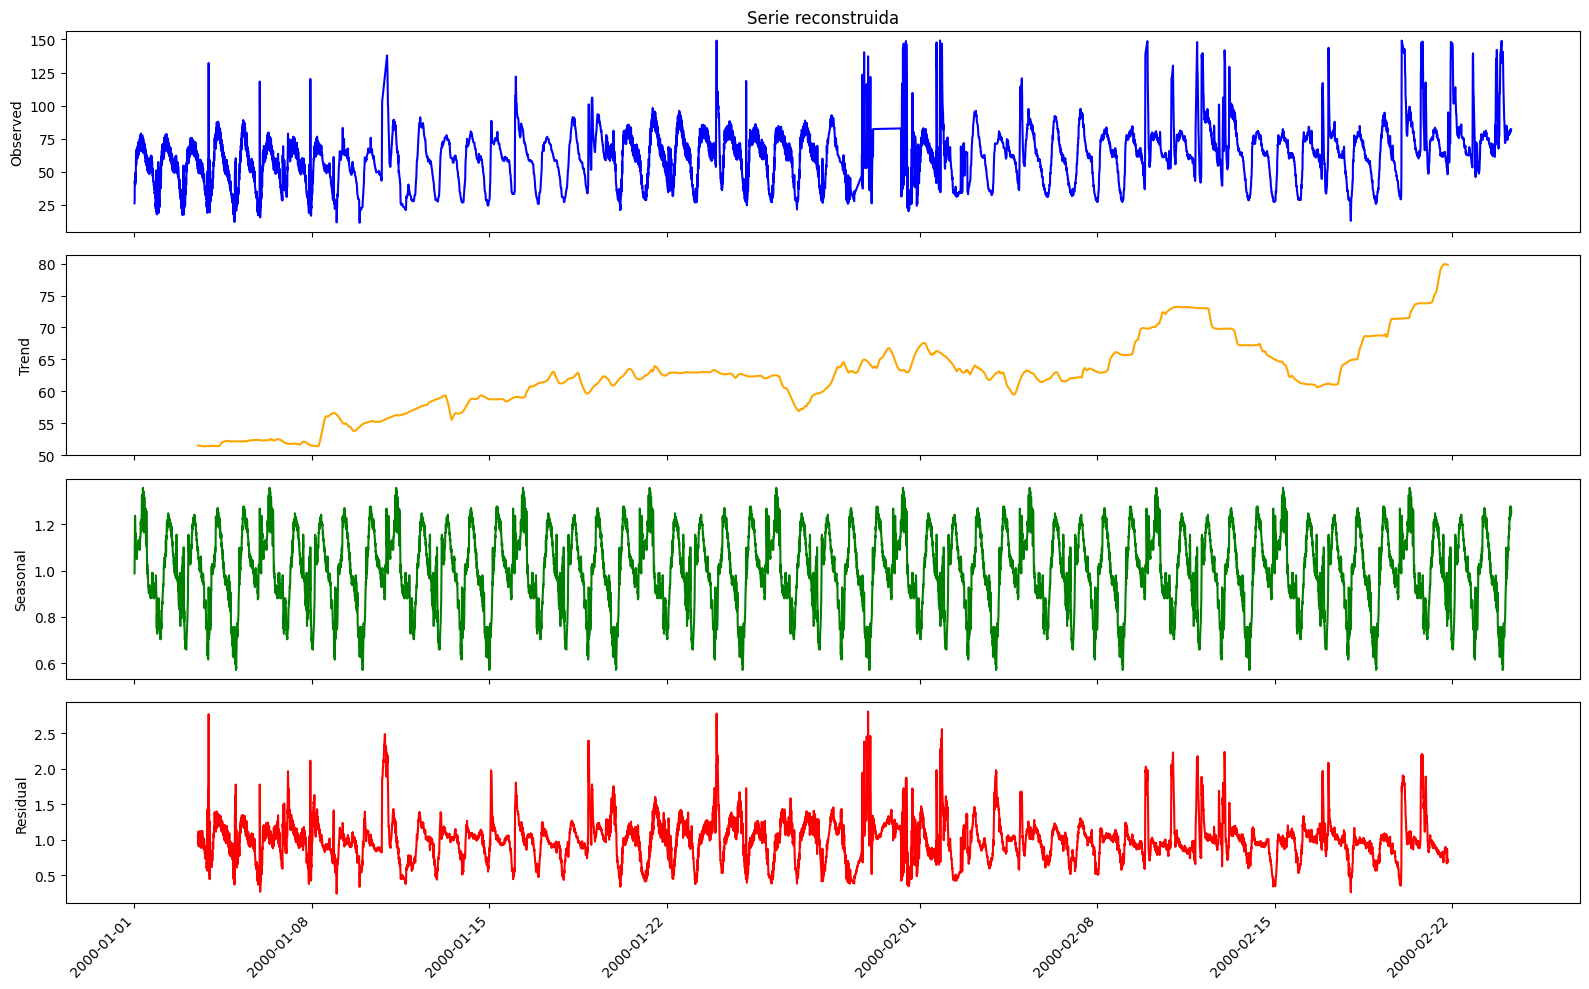

In [16]:
# Procesar series concatenadas

series_concatenadas = pd.concat(lista_series)
fecha_arbitraria = pd.Timestamp('2000-01-01 00:00')
serie_reconstruida = series_concatenadas.copy()
serie_reconstruida.index = pd.date_range(start=fecha_arbitraria, periods=len(series_concatenadas), freq='5min')
print(serie_reconstruida)

resultado = seasonal_decompose(serie_reconstruida.interpolate(), model='multiplicative', period=1440)
graficar_descomposicion('Serie reconstruida', resultado)
